## Testing Fraud model by fraud data set

In [3]:
import joblib
import pandas as pd
import sys, os

sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))
from feature_selection import FeatureSelection 


Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98    116878
           1       0.99      0.55      0.70     12268

    accuracy                           0.96    129146
   macro avg       0.97      0.77      0.84    129146
weighted avg       0.96      0.96      0.95    129146



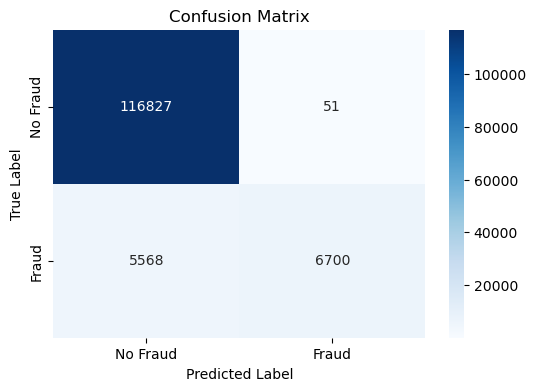

In [4]:
import pandas as pd
import joblib
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the fraud detection dataset 
fraud_data = pd.read_csv("../data/processed_fraud_data.csv").set_index('user_id')  # Replace with actual dataset path

# Load the saved best model
best_model = joblib.load("../api/decision_tree_fraud_best_model.pkl")  # Ensure the correct saved model name

# Select features and target variable
X = fraud_data.drop(columns=["class"])  # Exclude target column
y_true = fraud_data["class"]  # Actual labels
# Predict fraud using the loaded model
y_pred = best_model.predict(X)

# Compute and print classification report
print("Classification Report:\n", classification_report(y_true, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



In [5]:
# Select features and target variable
X = fraud_data.drop(columns=["class"])  # Exclude target column
y_true = fraud_data["class"]  # Actual labels

In [6]:

# Select only fraud entries (assuming 'class' column is the target variable)
fraud_entries = fraud_data[fraud_data["class"] == 1].drop(columns=["class"])  # Exclude target column



In [7]:
fraud_entries.head()

,purchase_value,age,purchase_delay,hour_of_day,day_of_week,fraud_rate,user_transaction_frequency,device_transaction_frequency,user_transaction_velocity,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M
user_id,,,,,,,,,,,,,,,,
145122,0.877158,-0.595271,-1.471404,-1.086411,-0.006798,0.121794,1,-0.259874,-0.232932,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59988,-1.197335,0.333314,-1.574394,-1.665264,-1.003270,0.121794,1,1.624177,4.292926,0.0,0.0,0.0,0.0,0.0,0.0,1.0
326442,-1.197335,0.333314,-1.574394,-1.665264,-1.003270,0.121794,1,1.624177,4.292926,0.0,0.0,0.0,0.0,0.0,0.0,1.0
330259,-1.197335,0.333314,-1.574394,-1.665264,-1.003270,0.121794,1,1.624177,4.292926,0.0,0.0,0.0,0.0,0.0,0.0,1.0
232759,-1.197335,0.333314,-1.574394,-1.665264,-1.003270,0.121794,1,1.624177,4.292926,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
#fraud_entries = fraud_entries.drop(columns=["user_id"])


In [9]:

# Predict fraud using the loaded model
fraud_predictions = best_model.predict(fraud_entries)


In [10]:

import numpy as np
# Add predictions back to the dataframe
fraud_data.loc[fraud_data["class"] == 1, "predicted_fraud"] = fraud_predictions

# Display results
print(fraud_data[fraud_data["class"] == 1][["predicted_fraud"]])  # Check fraud predictions

         predicted_fraud
user_id                 
145122               0.0
59988                1.0
326442               1.0
330259               1.0
232759               1.0
...                  ...
17463                0.0
66451                0.0
371436               0.0
208446               0.0
126332               0.0

[12268 rows x 1 columns]


In [11]:
unique, counts = np.unique(fraud_predictions, return_counts=True)
print(dict(zip(unique, counts)))

{0: 5568, 1: 6700}


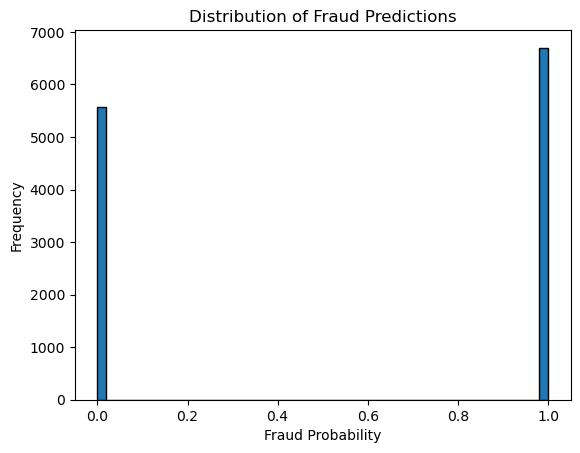

In [12]:
import matplotlib.pyplot as plt

plt.hist(fraud_predictions, bins=50, edgecolor='black')
plt.xlabel('Fraud Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Fraud Predictions')
plt.show()


In [13]:
binary_predictions = (fraud_predictions >= 0.5).astype(int)
unique, counts = np.unique(binary_predictions, return_counts=True)
print(dict(zip(unique, counts)))  # {0: count_non_fraud, 1: count_fraud}


{0: 5568, 1: 6700}


In [ ]:

print(f"Predictions < 0.1: {sum(fraud_predictions < 0.1)}")
print(f"Predictions > 0.9: {sum(fraud_predictions > 0.9)}")


Predictions < 0.1: 5568
Predictions > 0.9: 6700


## Testing Credit model by fraud data set

In [15]:
# Load the credit  dataset 
credit_data = pd.read_csv("../data/creditcard.csv")  # Replace with actual dataset path

# Load the saved best model
credit_best_model = joblib.load("../api/mlp_creditcard_best_model.pkl")  # Ensure the correct saved model name



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.94      0.89      0.91       492

    accuracy                           1.00    284807
   macro avg       0.97      0.94      0.96    284807
weighted avg       1.00      1.00      1.00    284807



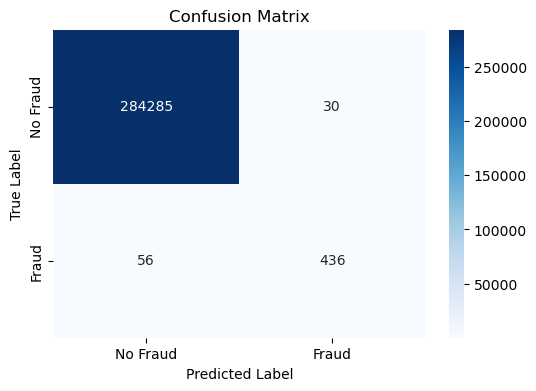

In [18]:
import pandas as pd
import joblib
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Select features and target variable
credit_X = credit_data.drop(columns=["Class"])  # Exclude target column
credit_y_true = credit_data["Class"]  # Actual labels
# Predict fraud using the loaded model
credit_y_pred = credit_best_model.predict(credit_X)

# Compute and print classification report
print("Classification Report:\n", classification_report(credit_y_true, credit_y_pred))

# Compute confusion matrix
credit_cm = confusion_matrix(credit_y_true, credit_y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(credit_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Select only fraud entries (assuming 'class' column is the target variable)
credit_fraud_entries = credit_data[credit_data["Class"] == 1].drop(columns=["Class"])  # Exclude target column



In [ ]:
# Predict fraud using the loaded model
credit_predictions = credit_best_model.predict(credit_fraud_entries)


In [ ]:

import numpy as np
# Add predictions back to the dataframe
credit_data.loc[credit_data["Class"] == 1, "predicted_fraud"] = credit_predictions

# Display results
print(credit_data[credit_data["Class"] == 1][["predicted_fraud"]])  # Check fraud predictions

        predicted_fraud
541                 1.0
623                 0.0
4920                1.0
6108                1.0
6329                0.0
...                 ...
279863              1.0
280143              1.0
280149              1.0
281144              1.0
281674              0.0

[492 rows x 1 columns]


In [ ]:
unique, counts = np.unique(credit_predictions, return_counts=True)
print(dict(zip(unique, counts)))

{0: 56, 1: 436}


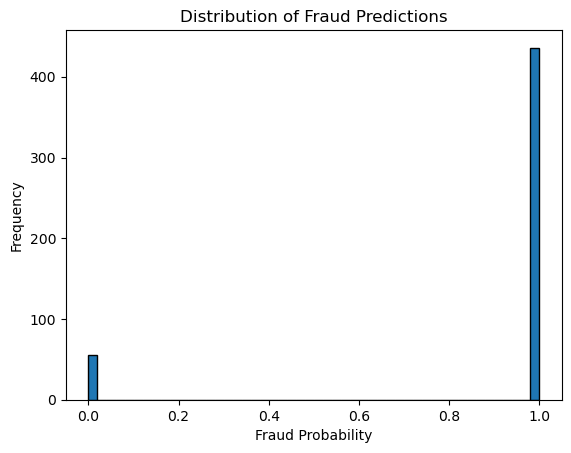

In [ ]:
import matplotlib.pyplot as plt

plt.hist(credit_predictions, bins=50, edgecolor='black')
plt.xlabel('Fraud Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Fraud Predictions')
plt.show()


In [ ]:
credit_binary_predictions = (credit_predictions >= 0.5).astype(int)
unique, counts = np.unique(credit_binary_predictions, return_counts=True)
print(dict(zip(unique, counts)))  # {0: count_non_fraud, 1: count_fraud}




{0: 56, 1: 436}


In [ ]:
print(f"Predictions < 0.1: {sum(credit_predictions < 0.1)}")
print(f"Predictions > 0.9: {sum(credit_predictions > 0.9)}")

Predictions < 0.1: 56
Predictions > 0.9: 436


: 